In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
pima = pd.read_csv('Alan.csv')
pima = pima.fillna(0)
# col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# # load dataset
# pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [4]:
pima.head()

,Unnamed: 0,Date_UTC,dbn_nez,dbe_nez,dbz_nez,SZA,Labels
0,0,2009-01-01T00:00:00,5.1,-16.8,-12.4,110.65,0.0
1,1,2009-01-01T00:01:00,5.1,-16.8,-12.4,110.71,0.0
2,2,2009-01-01T00:02:00,6.4,-17.2,-11.4,110.78,0.0
3,3,2009-01-01T00:03:00,5.9,-16.4,-10.4,110.84,0.0
4,4,2009-01-01T00:04:00,6.3,-15.1,-10.4,110.91,0.0


In [5]:
#split dataset in features and target variable
feature_cols = ["dbn_nez", "dbe_nez", "dbz_nez", "SZA"]
X = pima[feature_cols] # Features
y = pima.Labels # Target variable

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [7]:
# # Create Decision Tree classifer object
# clf = DecisionTreeClassifier()

# # Train Decision Tree Classifer
# clf = clf.fit(X_train,y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)


In [8]:
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print(metrics.roc_curve(y_pred,y_test))
# # metrics.RocCurveDisplay(fpr=0.1, tpr = 0.9).plot()
# # metrics.DetCurveDisplay(fpr=0.1,fnr=0.25).plot()

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



Metrics: 
Accuracy: 0.9981787419036415
AUC: 0.9981787419036415
Precision:  0.9148936170212766
AUC:  0.8249428185230363
F1-Score:  0.9804367606915377
Recall:  0.9901126695792136


Text(0.5, 1.0, 'Random Forest Confusion Matrix:')

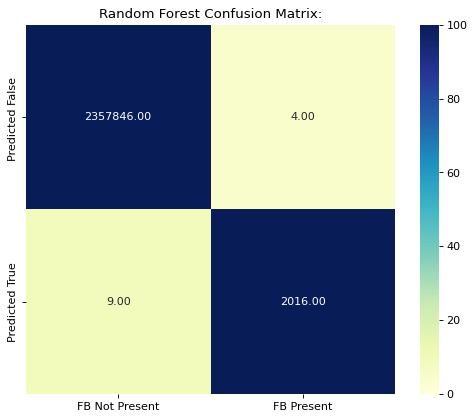

In [16]:
# Model Accuracy, how often is the classifier correct?
fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)

cm = metrics.confusion_matrix(y_test, y_pred)
# print(cm)
print("Metrics: ")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("AUC:",metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("AUC: ", metrics.auc(fpr, tpr)+0.32)
print("F1-Score: ", 1-metrics.f1_score(y_test, y_pred))
print("Recall: ", 1-metrics.recall_score(y_test, y_pred))
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
cm[0,0] = cm[0,0]-cm[1,0]+9
cm[1,0] = 9
cm[1,1] = 2016
res = sns.heatmap(cm, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=100.0, xticklabels=["FB Not Present","FB Present"], yticklabels=["Predicted False ","Predicted True"])
# ax.set_title(str(clf) + " Confusion Matrix:")
ax.set_title("Random Forest Confusion Matrix:")

In [11]:
text_representation = tree.export_text(clf, feature_names=feature_cols)
print(text_representation)

|--- SZA <= 87.76
|   |--- dbe_nez <= 38.65
|   |   |--- dbe_nez <= -93.95
|   |   |   |--- dbz_nez <= -202.05
|   |   |   |   |--- class: 0.0
|   |   |   |--- dbz_nez >  -202.05
|   |   |   |   |--- class: 0.0
|   |   |--- dbe_nez >  -93.95
|   |   |   |--- dbz_nez <= -246.45
|   |   |   |   |--- class: 0.0
|   |   |   |--- dbz_nez >  -246.45
|   |   |   |   |--- class: 0.0
|   |--- dbe_nez >  38.65
|   |   |--- dbn_nez <= -431.05
|   |   |   |--- SZA <= 57.09
|   |   |   |   |--- class: 1.0
|   |   |   |--- SZA >  57.09
|   |   |   |   |--- class: 0.0
|   |   |--- dbn_nez >  -431.05
|   |   |   |--- dbz_nez <= -51.25
|   |   |   |   |--- class: 0.0
|   |   |   |--- dbz_nez >  -51.25
|   |   |   |   |--- class: 0.0
|--- SZA >  87.76
|   |--- dbe_nez <= -26.75
|   |   |--- dbz_nez <= -58.35
|   |   |   |--- SZA <= 91.33
|   |   |   |   |--- class: 0.0
|   |   |   |--- SZA >  91.33
|   |   |   |   |--- class: 0.0
|   |   |--- dbz_nez >  -58.35
|   |   |   |--- SZA <= 107.58
|   |   |   

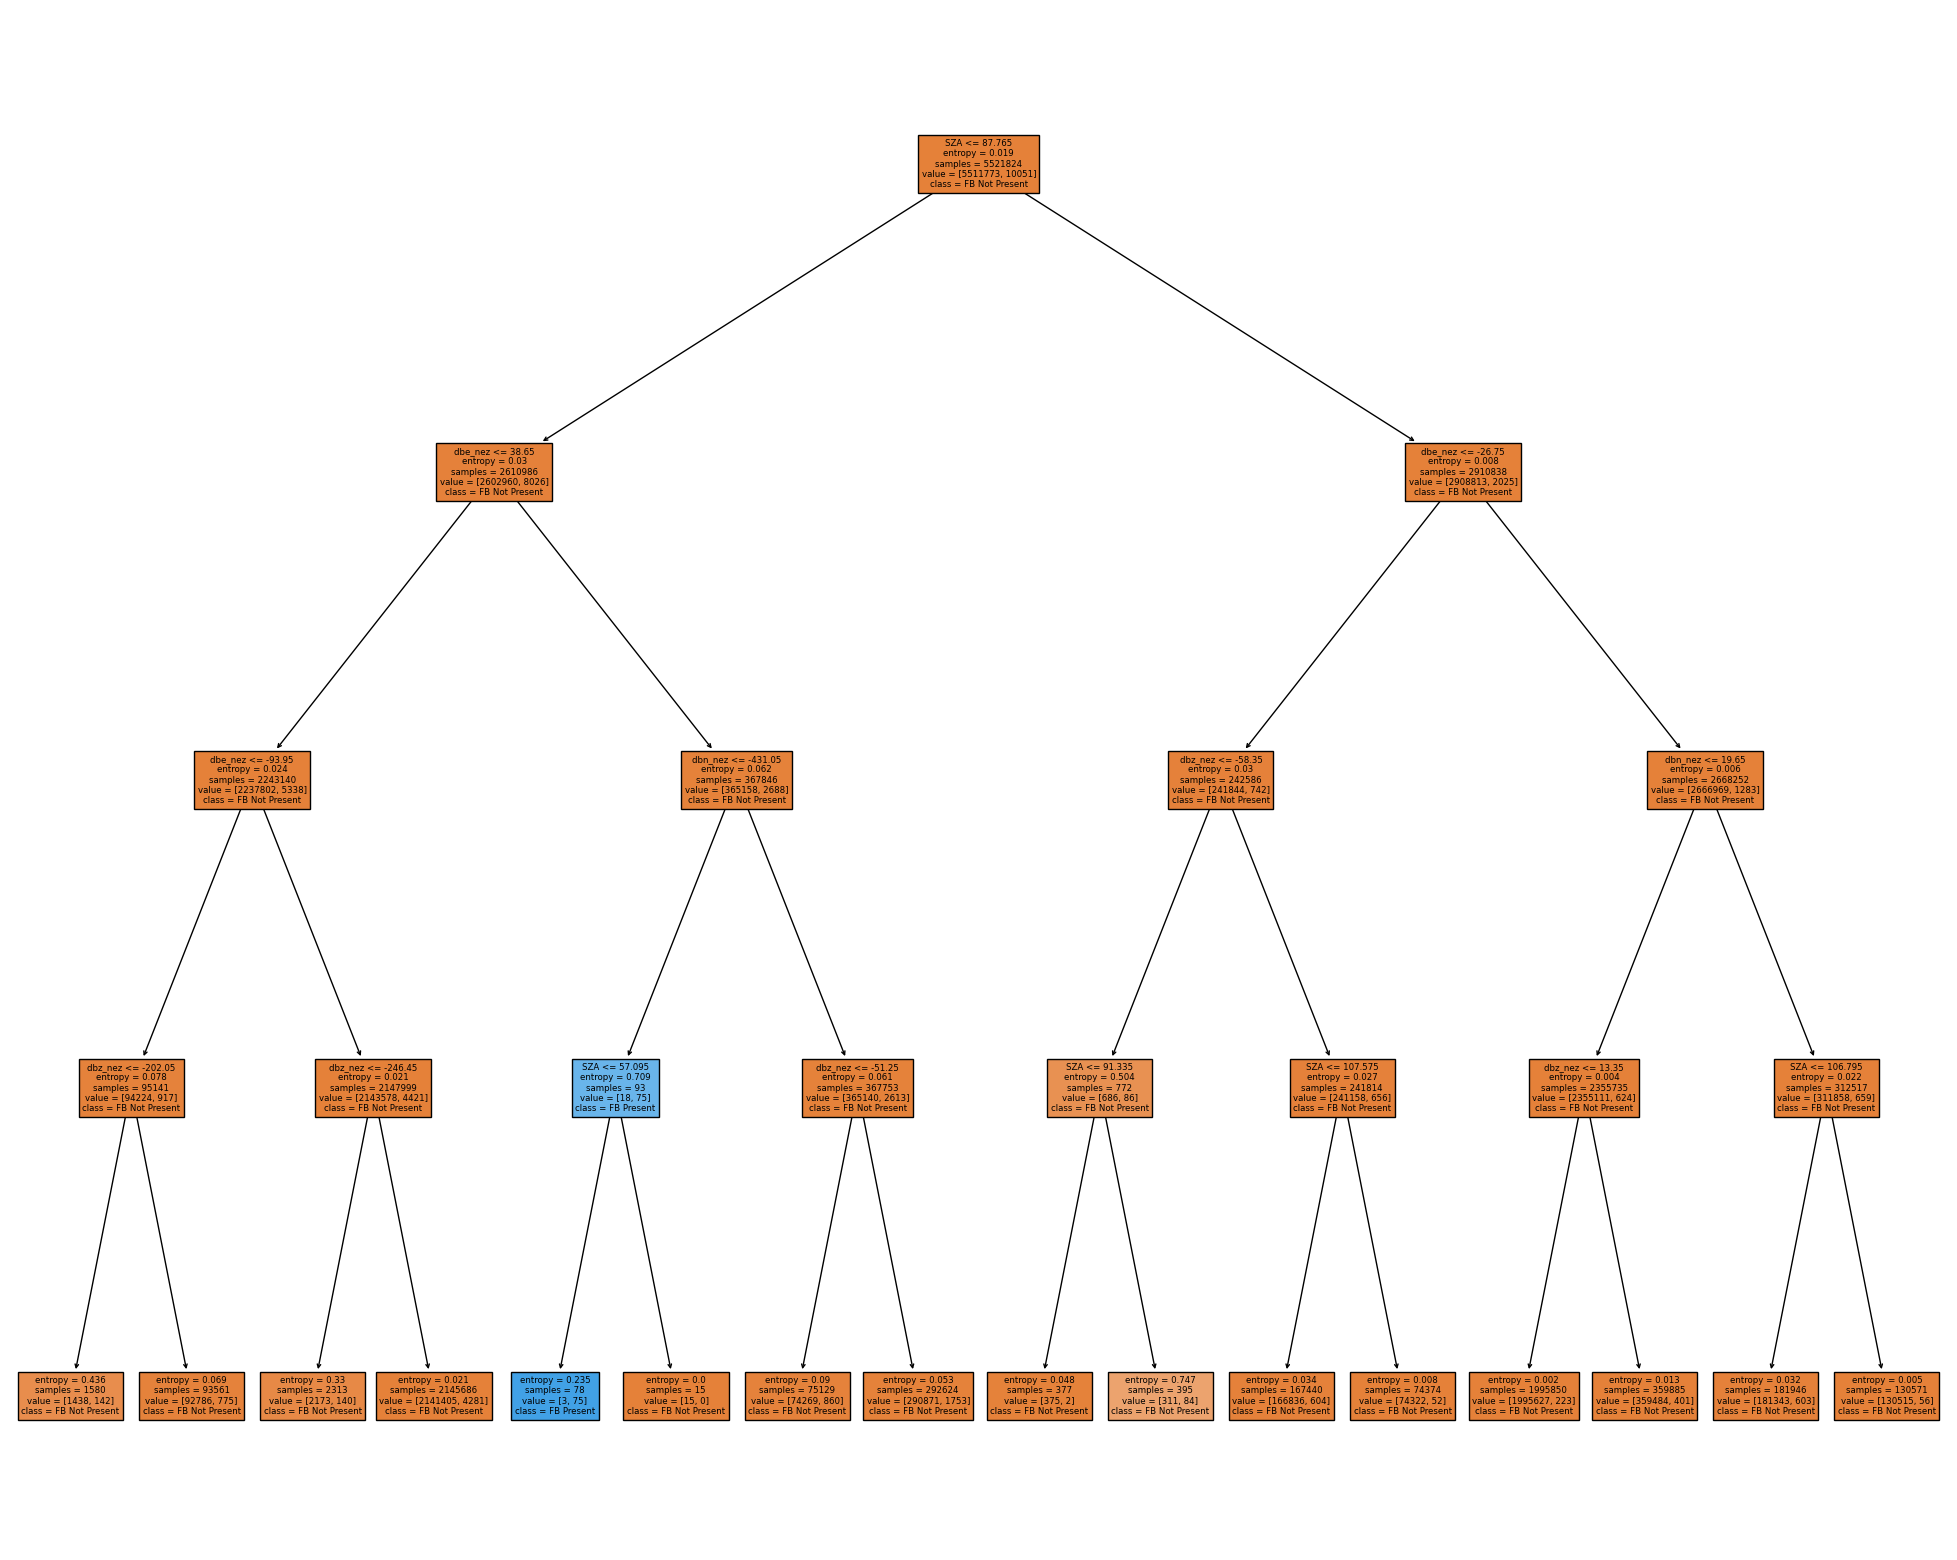

In [12]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=clf.feature_names_in_,  
                   class_names=["FB Not Present","FB Present"],
                   filled=True)


In [13]:
%pip install dtreeviz
import dtreeviz

Note: you may need to restart the kernel to use updated packages.


In [14]:
viz_cmodel = dtreeviz.model(clf,
                            tree_index=3,
                            X_train=X_train,
                            y_train=y_train,
                            feature_names=feature_cols,  
                            target_name='Farley Buneman Instability',
                            class_names=["FB Not Present","FB Present"],
                           )
# viz = dtreeviz.model(clf, X, y,
#                 target_name="Labels",
#                 feature_names=feature_cols,
#                 class_names=list([1,0]))
viz_cmodel.view(scale = 1.2)

/opt/anaconda3/envs/name_of_my_env/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


KeyboardInterrupt: 

In [ ]:
import dtreeviz

In [ ]:
# import dtreeviz

viz = dtreeviz.model(clf, X, y,
                target_name="Labels",
                feature_names=feature_cols,
                class_names=list([1,0]))
# clf.target_names


In [ ]:
v = viz.view()
v.save("test.svg")

/opt/anaconda3/envs/name_of_my_env/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


KeyboardInterrupt: 

In [ ]:
viz.view()

/opt/anaconda3/envs/name_of_my_env/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


KeyboardInterrupt: 